In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import MATRICES_DIR, REGIONES_DATA_FOLDER, REGIONES_IMAGE_FOLDER
from utils import regiones, idx_to_name

In [13]:
if os.path.exists(REGIONES_DATA_FOLDER):
    print(f'La carpeta {REGIONES_DATA_FOLDER} ya existe')
else:
    print('CREANDO', REGIONES_DATA_FOLDER)
    os.makedirs(REGIONES_DATA_FOLDER)

if os.path.exists(REGIONES_IMAGE_FOLDER):
    print(f'La carpeta {REGIONES_IMAGE_FOLDER} ya existe')
else:
    print('CREANDO', REGIONES_IMAGE_FOLDER)
    os.makedirs(REGIONES_IMAGE_FOLDER)

La carpeta c:\Users\ernes\Desktop\Nueva carpeta\Matrices de especializacion\datos\regiones ya existe
La carpeta c:\Users\ernes\Desktop\Nueva carpeta\Matrices de especializacion\plots\regiones ya existe


In [20]:
df=pd.read_csv(MATRICES_DIR, index_col='CODIGO')

column_names=df.columns # guarda los nombres para poder usar el num de municipio
df.columns = np.arange(1, 126)

df

,1,2,3,4,5,6,7,8,9,10,...,116,117,118,119,120,121,122,123,124,125
CODIGO,,,,,,,,,,,,,,,,,,,,,
112511,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
112512,38.615412,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
114112,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
114119,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
115111,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813110,0.000000,0.000000,8.837019,0.0,0.0,6.133620,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.722229,0.0,0.0,0.0,0.0,0.0
813120,0.000000,0.000000,0.000000,0.0,0.0,2.646521,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.528148,0.0,0.0,0.0,0.0,0.0
813130,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.802889,0.0,0.0,0.0,0.0,0.0


In [3]:
regiones

{'norte': [19, 31, 25, 41, 42, 61, 76, 81, 104, 115],
 'altos_norte': [35, 53, 64, 72, 73, 91, 109, 116],
 'altos_sur': [1, 8, 117, 46, 48, 60, 125, 74, 78, 93, 111, 118],
 'cienega': [13, 16, 33, 47, 18, 63, 66, 105, 123],
 'sureste': [30, 26, 50, 57, 59, 69, 56, 96, 107, 112],
 'sur': [79, 49, 65, 113, 85, 87, 99, 103, 108, 121, 122, 23],
 'sierra': [11, 15, 17, 32, 28, 34, 37, 54, 52, 88, 90, 102, 106, 110],
 'costa_sur': [21, 22, 27, 43, 100, 68],
 'costa_sierra': [12, 20, 38, 58, 62, 67, 80, 84],
 'valles': [3, 5, 6, 9, 36, 40, 55, 7, 75, 83, 94, 95],
 'lagunas': [2, 4, 10, 14, 24, 77, 82, 86, 89, 92, 114, 119],
 'centro': [29, 70, 39, 44, 45, 51, 71, 98, 97, 101, 120, 124]}

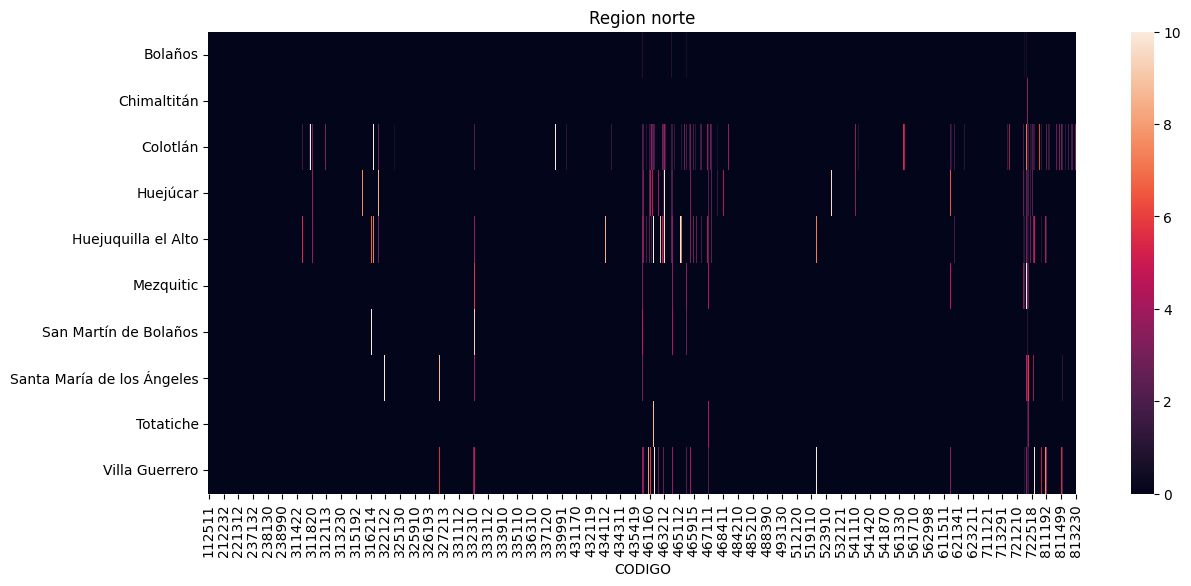

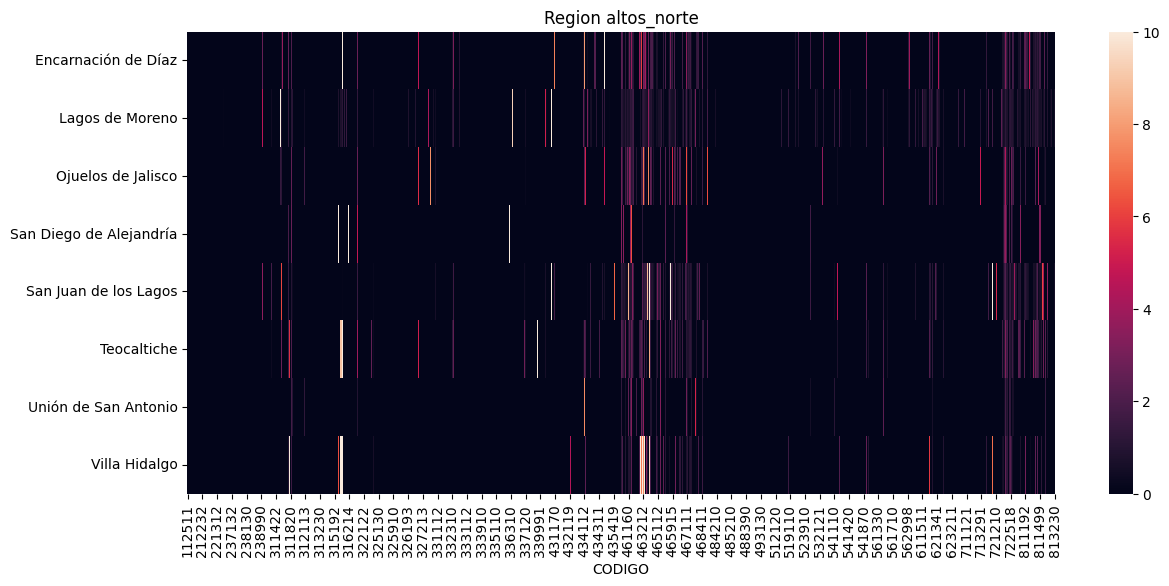

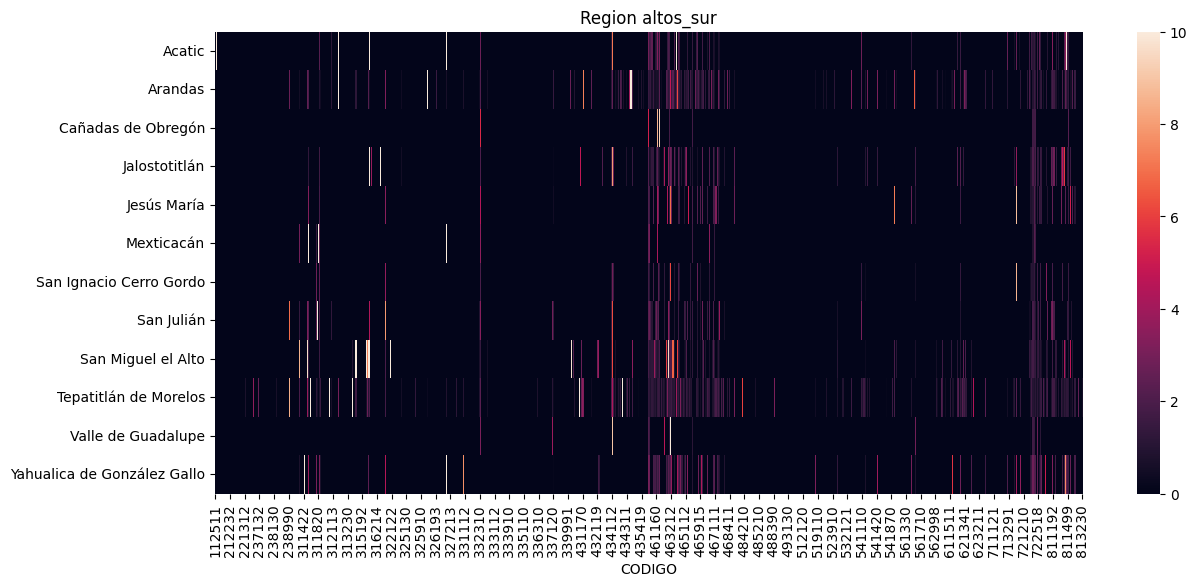

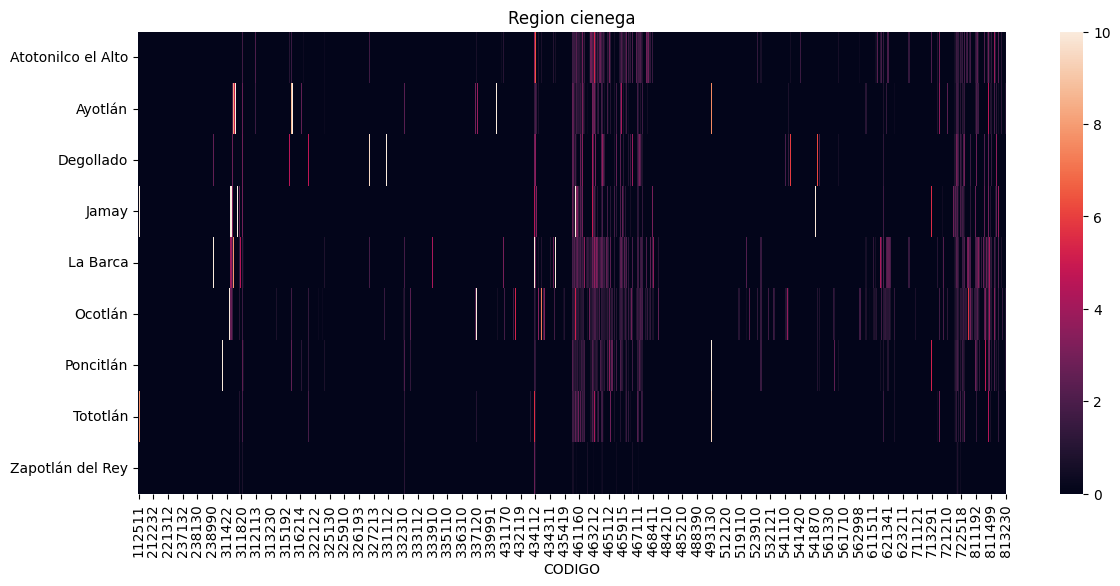

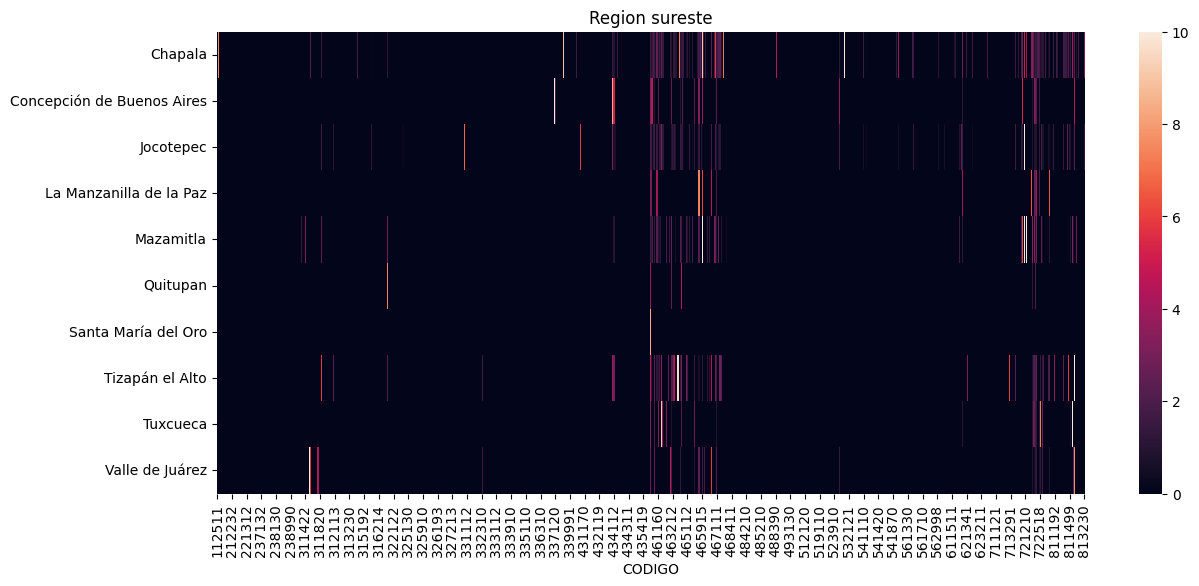

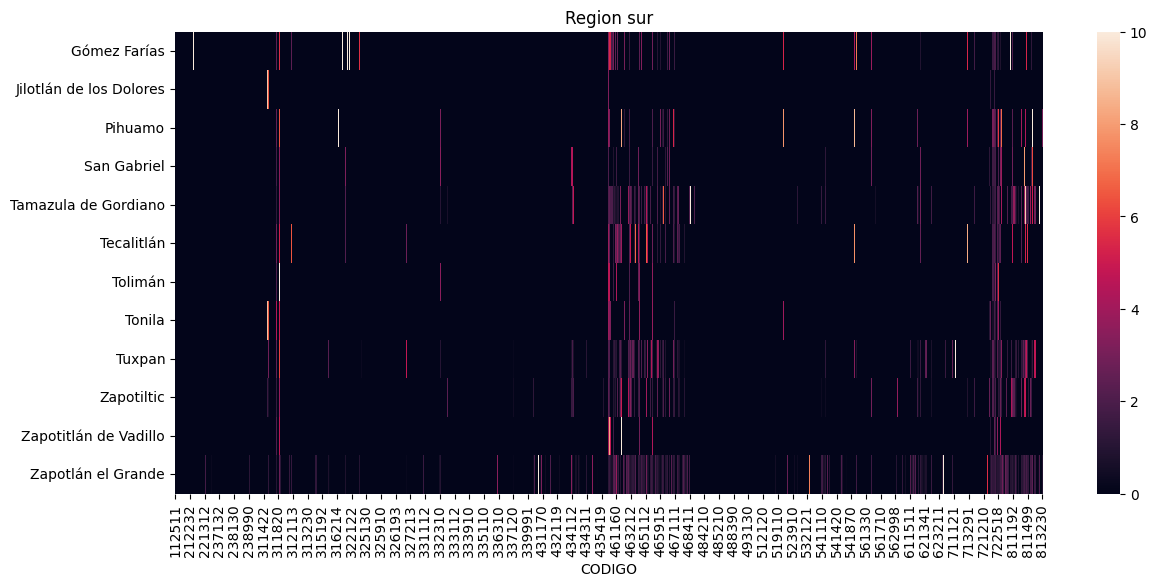

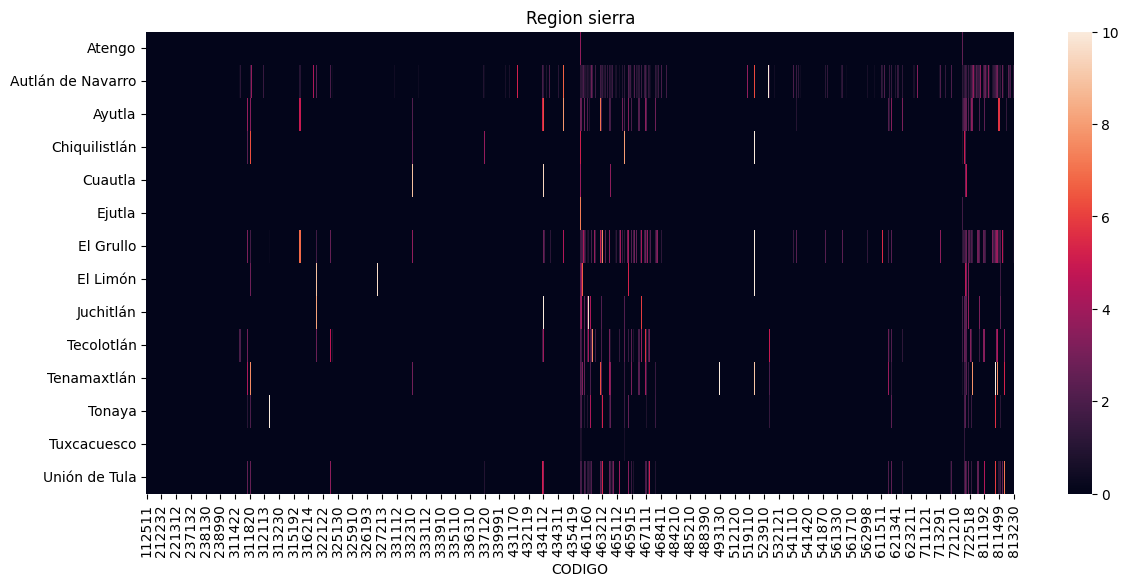

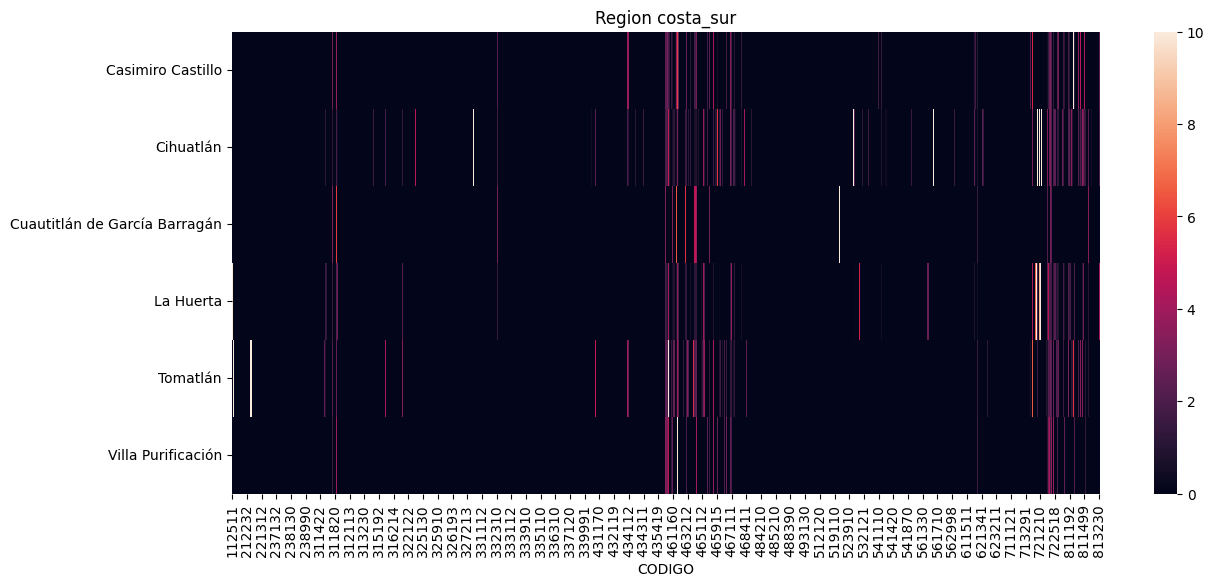

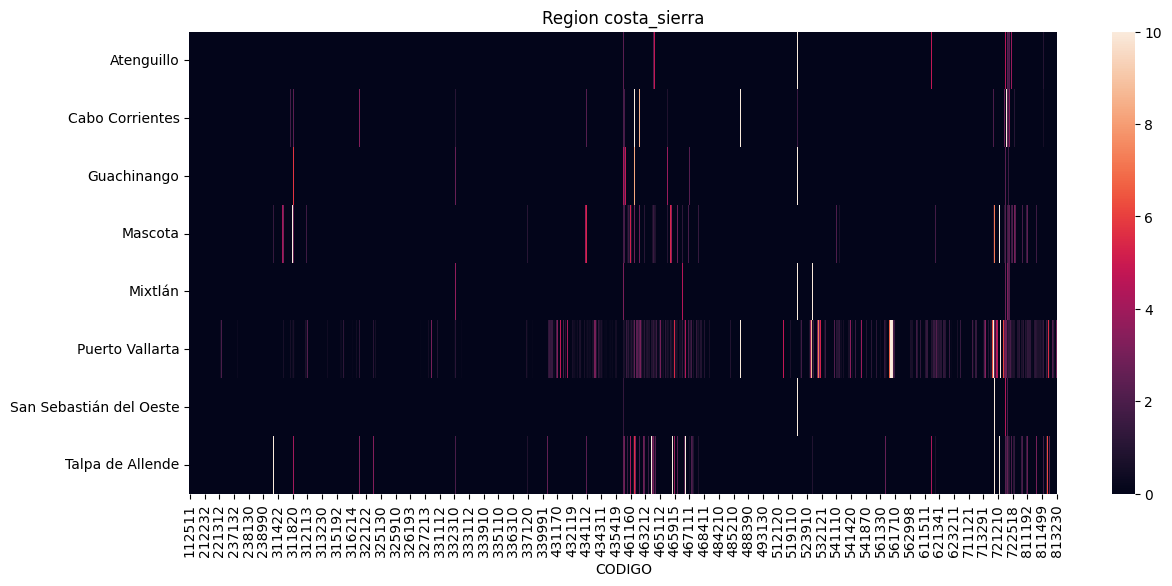

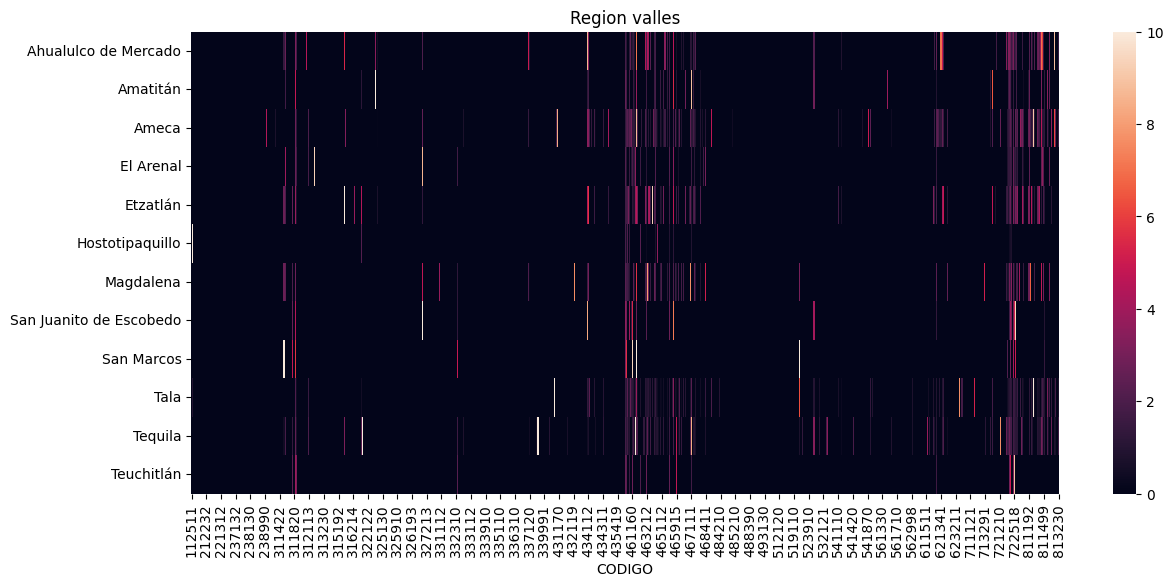

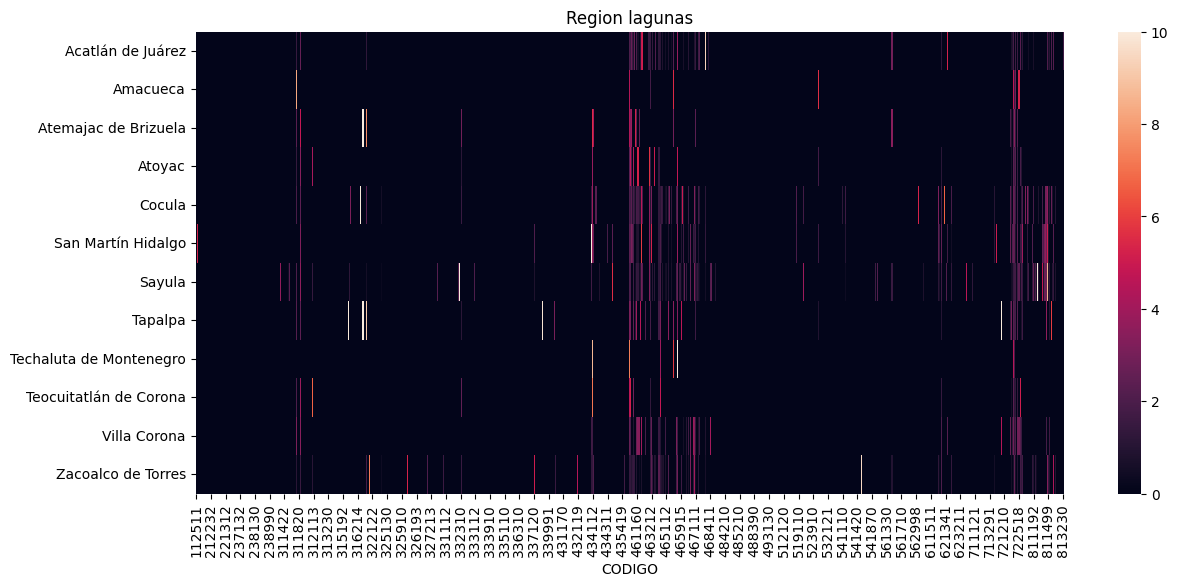

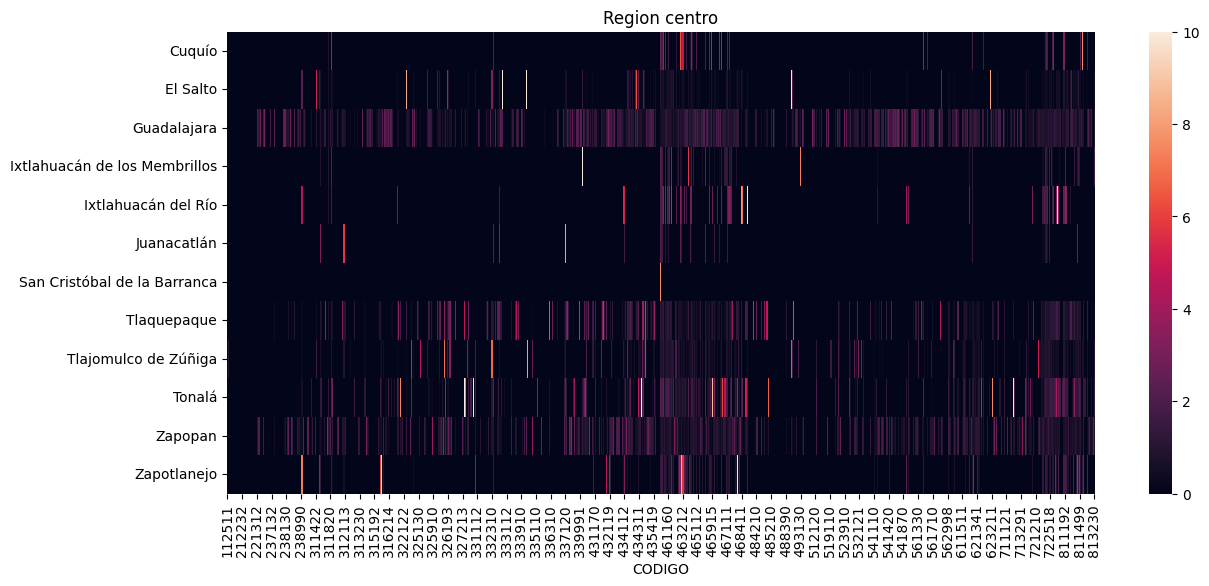

In [30]:
for region in regiones:
    df_region=df.loc[:, regiones[region]]
    df_region.columns=[idx_to_name(idx_col) for idx_col in df_region.columns]
    df_region.to_csv(os.path.join(REGIONES_DATA_FOLDER, f"{region}.csv"), index=False, mode='w')


    plt.figure(figsize=(14,6))
    sns.heatmap(df_region.T, vmax=10, vmin=0)
    plt.title(f'Region {region}')
    plt.savefig(os.path.join(REGIONES_IMAGE_FOLDER, f'{region}.png'))
    

In [12]:
df.iloc[:, regiones['norte']]

,20,32,26,42,43,62,77,82,105,116
0,0.0,0.0,0.0,0.0,269.629628,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,5.312107,0.0,7.724334,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
822,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
823,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
824,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
825,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


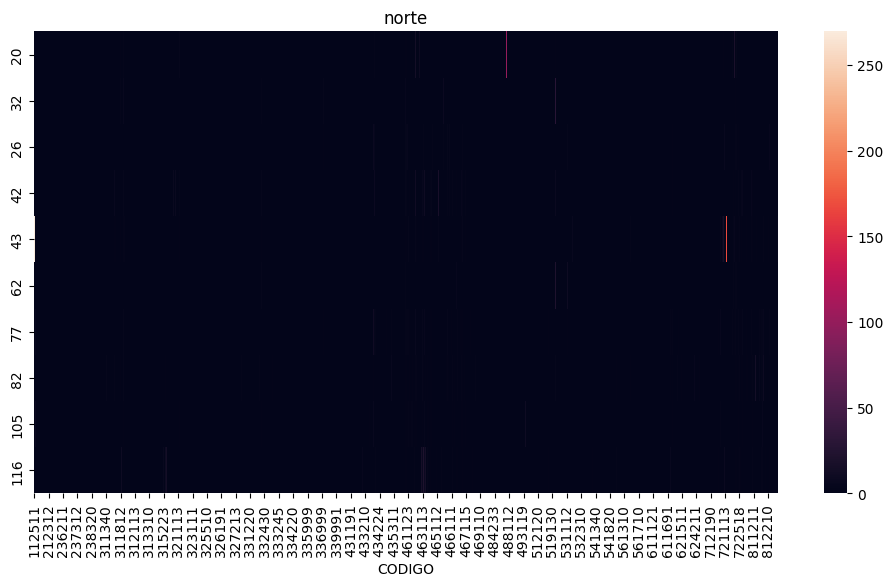

In [21]:
plt.figure(figsize=(14,6))
sns.heatmap(df.iloc[:, regiones['norte']].T, vmax=510, vmin=0)
plt.title('norte')
plt.savefig(os.path.join(REGIONES_IMAGE_FOLDER, 'norte.png'))